In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from graphviz import Source
from sklearn.tree import export_graphviz

In [2]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_iris.html
# https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = load_iris()
X = iris.data[:,2:]
y = iris.target
df=pd.DataFrame({
    iris.feature_names[2]: X[:,0],
    iris.feature_names[3]: X[:,1],
    'target': y
})
df['target name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()


,petal length (cm),petal width (cm),target,target name
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

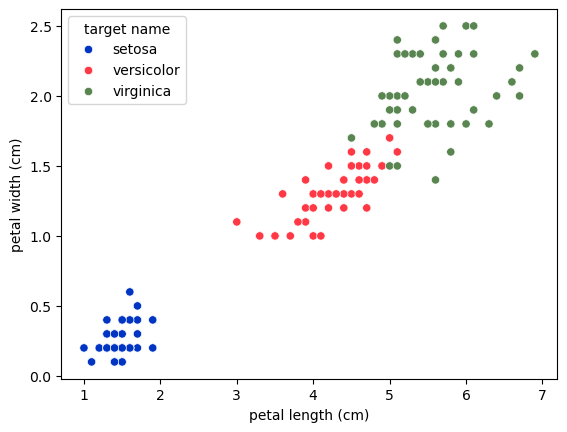

In [17]:
sns.scatterplot(data=df, x=iris.feature_names[2], y=iris.feature_names[3], hue = 'target name', palette=['#0034c3','#ff3845','#588550'])

In [4]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

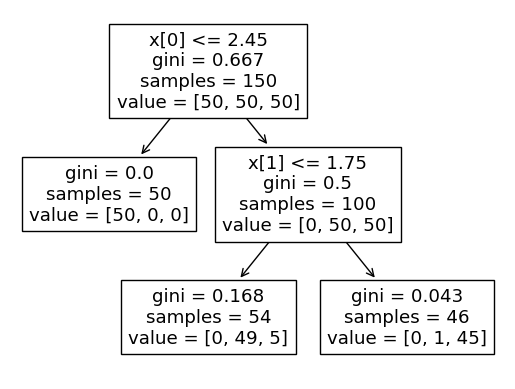

In [10]:
plot_tree(model);

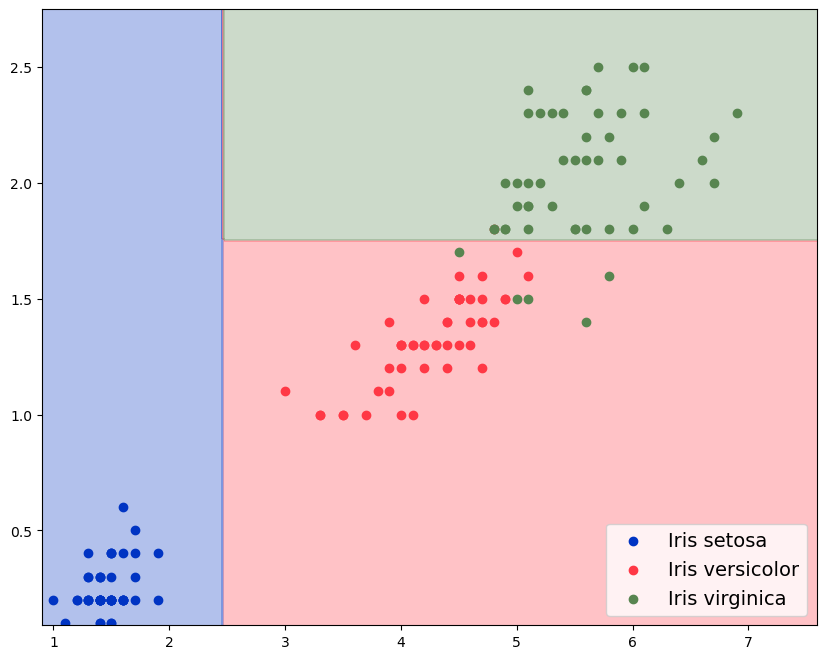

In [29]:
length_mesh = np.linspace(0.9*df['petal length (cm)'].min(), 1.1*df['petal length (cm)'].max(), 200)
width_mesh  = np.linspace(0.9*df['petal width (cm)'].min(), 1.1*df['petal width (cm)'].max(), 200)
x1, x2      = np.meshgrid(length_mesh, width_mesh)
x_mesh      = np.c_[x1.ravel(), x2.ravel()]
y_pred      = model.predict(x_mesh).reshape(x1.shape)

plt.figure(figsize=(10,8))
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=ListedColormap(['#0034c3','#ff3845','#588550']))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c="#0034c3", label="Iris setosa")
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c="#ff3845", label="Iris versicolor")
plt.scatter(X[:, 0][y==2], X[:, 1][y==2], c="#588550", label="Iris virginica")
plt.legend(loc="lower right", fontsize=14)


In [12]:
df['petal length (cm)'].min()

1.0

you can also do regression!